In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score
import scipy.io
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("train.csv")
df

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [3]:
X = df[["clonesize", 'honeybee', "bumbles", 'andrena', 'osmia', 'MaxOfUpperTRange', 
                     'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', "MinOfLowerTRange",
                     "AverageOfLowerTRange", "RainingDays", "AverageRainingDays", "fruitset",
                      "fruitmass", "seeds"]]
y = df['yield']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
modelo = RandomForestRegressor(n_estimators=20, max_depth=6)
modelo.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=20)

In [6]:
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

Error absoluto medio (MAE): 353.41136183523304


In [32]:
def generate_submision_df(columns):
    df_test = pd.read_csv('test.csv',sep=",")
    X_sub = df_test[["clonesize", 'honeybee', "bumbles", 'andrena', 'osmia', 'MaxOfUpperTRange', 
                     'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', "MinOfLowerTRange",
                     "AverageOfLowerTRange", "RainingDays", "AverageRainingDays", "fruitset",
                      "fruitmass", "seeds"]]
    X_sub = X_sub[columns.values]
    
    return X_sub

In [33]:
def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv('test.csv', sep=",")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test['id'], 'yield': y})
    df_sub.to_csv(f"submissions/submission_{submission_number}.csv", index=False)

In [34]:
X_sub = generate_submision_df(X_train.columns)
generate_submission_file(modelo, X_sub, 6)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model_lineal = LinearRegression()
model_lineal.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model_lineal.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

Error absoluto medio (MAE): 370.44752745285837


In [10]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor([('rf', modelo), ('linear', model_lineal)], weights=[3/4,1/4])
voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=6,
                                                   n_estimators=20)),
                            ('linear', LinearRegression())],
                weights=[0.75, 0.25])

In [49]:
ensamble=voting_reg.predict(X_test)
mae = mean_absolute_error(y_test, ensamble)
print("Error absoluto medio (MAE):", mae)

Error absoluto medio (MAE): 348.48285456791314


In [50]:
def generate_submision_df(columns):
    df_test = pd.read_csv('test.csv',sep=",")
    X_sub = df_test[["clonesize", 'honeybee', "bumbles", 'andrena', 'osmia', 'MaxOfUpperTRange', 
                     'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', "MinOfLowerTRange",
                     "AverageOfLowerTRange", "RainingDays", "AverageRainingDays", "fruitset",
                      "fruitmass", "seeds"]]
    X_sub = X_sub[columns.values]
    
    return X_sub

In [51]:
def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv('test.csv', sep=",")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test['id'], 'yield': y})
    df_sub.to_csv(f"submissions/submission_{submission_number}.csv", index=False)

In [52]:
X_sub = generate_submision_df(X_train.columns)
generate_submission_file(voting_reg, X_sub, 7)

In [11]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [12]:
model_xg = xgb.XGBRegressor(n_estimators=100)

In [13]:
# Entrenar el modelo
model_xg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_xg.predict(X_test)

In [80]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 366.102596523412


In [14]:
model_xg = xgb.XGBRegressor()

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {'max_depth': [3, 4, 5, 6, 7]}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=model_xg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
best_max_depth = grid_search.best_params_['max_depth']
print("Mejor valor para max_depth:", best_max_depth)

Mejor valor para max_depth: 3


In [15]:
# Entrenar el modelo con el mejor valor de max_depth
best_model = xgb.XGBRegressor(max_depth=best_max_depth)
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular el MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 350.94432693700435


In [43]:
from sklearn.ensemble import VotingRegressor
voting_reg1 = VotingRegressor([('rf', modelo), ('linear', model_lineal), ('XG', best_model)], weights=[5/10, 1/10, 4/10])
voting_reg1.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=6,
                                                   n_estimators=20)),
                            ('linear', LinearRegression()),
                            ('XG',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_i...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))],
                weights=[0.5, 0.1, 0.4])

In [44]:
ensamble1=voting_reg1.predict(X_test)
mae = mean_absolute_error(y_test, ensamble1)
print("Error absoluto medio (MAE):", mae)

Error absoluto medio (MAE): 345.8622751236865


In [45]:
def generate_submision_df(columns):
    df_test = pd.read_csv('test.csv',sep=",")
    X_sub = df_test[["clonesize", 'honeybee', "bumbles", 'andrena', 'osmia', 'MaxOfUpperTRange', 
                     'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', "MinOfLowerTRange",
                     "AverageOfLowerTRange", "RainingDays", "AverageRainingDays", "fruitset",
                      "fruitmass", "seeds"]]
    X_sub = X_sub[columns.values]
    
    return X_sub

In [46]:
def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv('test.csv', sep=",")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test['id'], 'yield': y})
    df_sub.to_csv(f"submissions/submission_{submission_number}.csv", index=False)

In [47]:
X_sub = generate_submision_df(X_train.columns)
generate_submission_file(voting_reg1, X_sub, 9)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
model_gb = GradientBoostingRegressor(max_depth=4, n_estimators=100)

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_gb.predict(X_test)

# Calcular el MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 349.6646734146251


In [102]:
model_xg1 = GradientBoostingRegressor(n_estimators=100)

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid1 = {'max_depth': [3, 4, 5, 6, 7]}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search1 = GridSearchCV(estimator=model_xg1, param_grid=param_grid1, cv=5, scoring='neg_mean_absolute_error')
grid_search1.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
best_max_depth1 = grid_search1.best_params_['max_depth']
print("Mejor valor para max_depth:", best_max_depth1)

Mejor valor para max_depth: 4


In [103]:
voting_reg2 = VotingRegressor([('rf', modelo), ('linear', model_lineal)('XG', best_model), ('Gradient', model_gb)], weights=[7/20, 2/20, 6/20, 5/20])
voting_reg2.fit(X_train, y_train)

<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\ismme\AppData\Local\Temp\ipykernel_20040\3064134211.py:1: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  voting_reg2 = VotingRegressor([('rf', modelo), ('linear', model_lineal)('XG', best_model), ('Gradient', model_gb)], weights=[7/20, 2/20, 6/20, 5/20])


TypeError: 'tuple' object is not callable

In [104]:
ensamble2=voting_reg2.predict(X_test)
mae = mean_absolute_error(y_test, ensamble2)
print("Error absoluto medio (MAE):", mae)

Error absoluto medio (MAE): 346.98000751919267


In [105]:
def generate_submision_df(columns):
    df_test = pd.read_csv('test.csv',sep=",")
    X_sub = df_test[["clonesize", 'honeybee', "bumbles", 'andrena', 'osmia', 'MaxOfUpperTRange', 
                     'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', "MinOfLowerTRange",
                     "AverageOfLowerTRange", "RainingDays", "AverageRainingDays", "fruitset",
                      "fruitmass", "seeds"]]
    X_sub = X_sub[columns.values]
    
    return X_sub

In [106]:
def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv('test.csv', sep=",")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test['id'], 'yield': y})
    df_sub.to_csv(f"submissions/submission_{submission_number}.csv", index=False)

In [107]:
X_sub = generate_submision_df(X_train.columns)
generate_submission_file(voting_reg2, X_sub, 10)

In [92]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

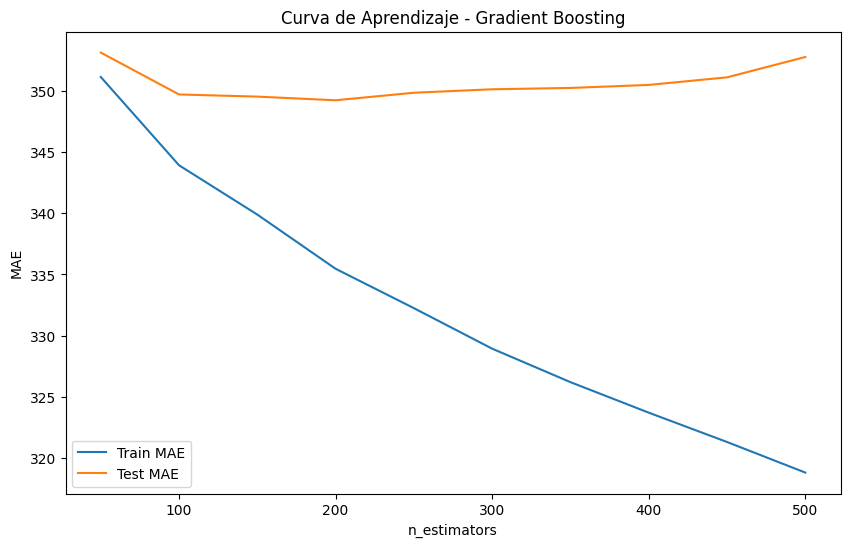

In [93]:
# Crear una función para calcular el MAE promedio en validación cruzada
def get_cv_mae(model, X, y):
    mae = -1 * np.mean(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5))
    return mae

# Definir una lista de posibles valores para n_estimators
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Crear listas vacías para almacenar los resultados de entrenamiento y prueba
train_mae = []
test_mae = []

# Iterar sobre los valores de n_estimators
for n in n_estimators:
    # Crear el modelo Gradient Boosting con el valor actual de n_estimators
    modell = GradientBoostingRegressor(n_estimators=n)
    
    # Calcular el MAE promedio en validación cruzada para el modelo actual
    cv_mae = get_cv_mae(modell, X_train, y_train)
    
    # Entrenar el modelo en los datos de entrenamiento
    modell.fit(X_train, y_train)
    
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = modell.predict(X_train)
    y_test_pred = modell.predict(X_test)
    
    # Calcular el MAE en los conjuntos de entrenamiento y prueba
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_mae, label='Train MAE')
plt.plot(n_estimators, test_mae, label='Test MAE')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('Curva de Aprendizaje - Gradient Boosting')
plt.legend()
plt.show()








In [99]:
model_SVR = SVR(kernel='linear', C=3.0)

# Entrenar el modelo
model_SVR.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model_SVR.predict(X_train)
y_test_pred = model_SVR.predict(X_test)

# Calcular el MAE en los conjuntos de entrenamiento y prueba
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Imprimir el MAE en los conjuntos de entrenamiento y prueba
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train MAE: 419.5455698546245
Test MAE: 415.3063450245782


In [98]:
# Definir los parámetros a buscar en la cuadrícula
param_grid2 = {'C': [0.1, 1, 10, 100]}

# Crear el modelo de SVM de regresión
model2 = SVR(kernel='linear')

# Realizar la búsqueda de cuadrícula
grid_search2 = GridSearchCV(model2, param_grid2, scoring='neg_mean_absolute_error', cv=5)
grid_search2.fit(X_train, y_train)

# Obtener el mejor modelo y los mejores parámetros
best_model2 = grid_search.best_estimator_
best_params2 = grid_search.best_params_

# Realizar predicciones en los conjuntos de prueba
y_test_pred = best_model2.predict(X_test)

# Calcular el MAE en el conjunto de prueba
test_mae = mean_absolute_error(y_test, y_test_pred)

# Imprimir el MAE y los mejores parámetros
print("Test MAE:", test_mae)
print("Best Parameters:", best_params2)

Test MAE: 350.94432693700435
Best Parameters: {'max_depth': 3}
